# Thyroid 

In [ ]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")

Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

In [ ]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [ ]:
!wget -nc -r --no-parent -l3 http://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/

File ‘archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/index.html’ already there; not retrieving.

Loading robots.txt; please ignore errors.
--2022-02-20 19:31:00--  http://archive.ics.uci.edu/robots.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-02-20 19:31:00 ERROR 404: Not Found.

File ‘archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/HELLO’ already there; not retrieving.

File ‘archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/Index’ already there; not retrieving.

File ‘archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allbp.data’ already there; not retrieving.

File ‘archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allbp.names’ already there; not retrieving.

File ‘archive.ics.uci.edu/ml/machine-learning-databases/thyroid-dise

# Data Wrangling

Define a helper function to find the start index in names file

In [ ]:
def find_start_index(txt_lines, start_string):
    for i, elem in enumerate(txt_lines):
        if start_string in elem:
            return i


Define a helper function to get the attribute names in names file

In [ ]:
def find_attribute_names(txt_lines, start_index):
    attribute_names = []
    for line in txt_lines[start_index:]:
        line = line.split(':')
        attribute_names.append(line[0])
    return attribute_names


In [ ]:
base_directory = os.getcwd()
directory = os.path.join(base_directory, "archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease")


## Thyroid-allbp dataset

### Train set

In [ ]:
with open(os.path.join(directory, "allbp.names")) as f:
    contents = f.readlines()

In [ ]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [ ]:
names.append('class')

In [ ]:
data_allbp = pd.read_csv(os.path.join(directory, "allbp.data"),
                   names=names, delimiter=r',')
data_allbp[["class","id"]] = data_allbp["class"].apply(lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [ ]:
data_allbp.drop(["id"], axis=1, inplace=True)
data_allbp.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [ ]:
data_allbp["patient_id"] = range(1, len(data_allbp) + 1)

In [ ]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [ ]:

for att in continuous_attributes:
    data_allbp[att].replace('?', np.NaN, inplace=True)
    data_allbp[att] = pd.to_numeric(data_allbp[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allbp[att].replace('?', np.NaN, inplace=True)
        data_allbp[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allbp[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allbp[att] = pd.to_numeric(data_allbp[att])

In [ ]:
data_allbp.set_index("patient_id", inplace=True)

In [ ]:
data_allbp.to_csv("thyroid_allbp_train_prepared.csv")

### Test set

In [ ]:
with open(os.path.join(directory, "allbp.names")) as f:
    contents = f.readlines()

In [ ]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [ ]:
names.append('class')

In [ ]:
data_allbp = pd.read_csv(os.path.join(directory, "allbp.test"),
                   names=names, delimiter=r',')
data_allbp[["class","id"]] = data_allbp["class"].apply(lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [ ]:
data_allbp.drop(["id"], axis=1, inplace=True)
data_allbp.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [ ]:
data_allbp["patient_id"] = range(1, len(data_allbp) + 1)

In [ ]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [ ]:

for att in continuous_attributes:
    data_allbp[att].replace('?', np.NaN, inplace=True)
    data_allbp[att] = pd.to_numeric(data_allbp[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allbp[att].replace('?', np.NaN, inplace=True)
        data_allbp[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allbp[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allbp[att] = pd.to_numeric(data_allbp[att])

In [ ]:
data_allbp.set_index("patient_id", inplace=True)

In [ ]:
data_allbp.to_csv("thyroid_allbp_test_prepared.csv")

## Thyroid-allhyper dataset

### Train set

In [ ]:
with open(os.path.join(directory, "allhyper.names")) as f:
    contents = f.readlines()

In [ ]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [ ]:
names.append('class')

In [ ]:
data_allhyper = pd.read_csv(os.path.join(directory, "allhyper.data"),
                   names=names, delimiter=r',')
data_allhyper[["class","id"]] = data_allhyper["class"].apply(lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [ ]:
data_allhyper.drop(["id"], axis=1, inplace=True)
data_allhyper.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [ ]:
data_allhyper["patient_id"] = range(1, len(data_allhyper) + 1)

In [ ]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [ ]:

for att in continuous_attributes:
    data_allhyper[att].replace('?', np.NaN, inplace=True)
    data_allhyper[att] = pd.to_numeric(data_allhyper[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allhyper[att].replace('?', np.NaN, inplace=True)
        data_allhyper[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allhyper[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allhyper[att] = pd.to_numeric(data_allhyper[att])

In [ ]:
data_allhyper.set_index("patient_id", inplace=True)

In [ ]:
data_allbp.to_csv("thyroid_allhyper_train_prepared.csv")

### Test set

In [ ]:
with open(os.path.join(directory, "allhyper.names")) as f:
    contents = f.readlines()

In [ ]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [ ]:
names.append('class')

In [ ]:
data_allhyper = pd.read_csv(os.path.join(directory, "allhyper.test"),
                   names=names, delimiter=r',')
data_allhyper[["class","id"]] = data_allhyper["class"].apply(lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [ ]:
data_allhyper.drop(["id"], axis=1, inplace=True)
data_allhyper.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [ ]:
data_allhyper["patient_id"] = range(1, len(data_allhyper) + 1)

In [ ]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [ ]:

for att in continuous_attributes:
    data_allhyper[att].replace('?', np.NaN, inplace=True)
    data_allhyper[att] = pd.to_numeric(data_allhyper[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allhyper[att].replace('?', np.NaN, inplace=True)
        data_allhyper[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allhyper[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allhyper[att] = pd.to_numeric(data_allhyper[att])

In [ ]:
data_allhyper.set_index("patient_id", inplace=True)

In [ ]:
data_allhyper.to_csv("thyroid_allhyper_test_prepared.csv")

## Thyroid-allhypo dataset

### Train set

In [ ]:
with open(os.path.join(directory, "allhypo.names")) as f:
    contents = f.readlines()

In [ ]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [ ]:
names.append('class')

In [ ]:
data_allhypo = pd.read_csv(os.path.join(directory, "allhypo.data"),
                   names=names, delimiter=r',')
data_allhypo[["class","id"]] = data_allhypo["class"].apply(lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [ ]:
data_allhypo.drop(["id"], axis=1, inplace=True)
data_allhypo.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [ ]:
data_allhypo["patient_id"] = range(1, len(data_allhypo) + 1)

In [ ]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [ ]:

for att in continuous_attributes:
    data_allhypo[att].replace('?', np.NaN, inplace=True)
    data_allhypo[att] = pd.to_numeric(data_allhypo[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allhypo[att].replace('?', np.NaN, inplace=True)
        data_allhypo[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allhypo[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allhypo[att] = pd.to_numeric(data_allhypo[att])

In [ ]:
data_allhypo.set_index("patient_id", inplace=True)

In [ ]:
data_allhypo.to_csv("thyroid_allhypo_train_prepared.csv")

### Test set

In [ ]:
with open(os.path.join(directory, "allhypo.names")) as f:
    contents = f.readlines()

In [ ]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [ ]:
names.append('class')

In [ ]:
data_allhypo = pd.read_csv(os.path.join(directory, "allhypo.test"),
                   names=names, delimiter=r',')
data_allhypo[["class","id"]] = data_allhypo["class"].apply(lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [ ]:
data_allhypo.drop(["id"], axis=1, inplace=True)
data_allhypo.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [ ]:
data_allhypo["patient_id"] = range(1, len(data_allhypo) + 1)

In [ ]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [ ]:

for att in continuous_attributes:
    data_allhypo[att].replace('?', np.NaN, inplace=True)
    data_allhypo[att] = pd.to_numeric(data_allhypo[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allhypo[att].replace('?', np.NaN, inplace=True)
        data_allhypo[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allhypo[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allhypo[att] = pd.to_numeric(data_allhypo[att])

In [ ]:
data_allhypo.set_index("patient_id", inplace=True)

In [ ]:
data_allhypo.to_csv("thyroid_allhypo_test_prepared.csv")

## Thyroid-allrep dataset

### Train set

In [ ]:
with open(os.path.join(directory, "allrep.names")) as f:
    contents = f.readlines()

In [ ]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [ ]:
names.append('class')

In [ ]:
data_allrep = pd.read_csv(os.path.join(directory, "allrep.data"),
                   names=names, delimiter=r',')
data_allrep[["class","id"]] = data_allrep["class"].apply(lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [ ]:
data_allrep.drop(["id"], axis=1, inplace=True)
data_allrep.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [ ]:
data_allrep["patient_id"] = range(1, len(data_allrep) + 1)

In [ ]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [ ]:

for att in continuous_attributes:
    data_allrep[att].replace('?', np.NaN, inplace=True)
    data_allrep[att] = pd.to_numeric(data_allrep[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allrep[att].replace('?', np.NaN, inplace=True)
        data_allrep[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allrep[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allrep[att] = pd.to_numeric(data_allrep[att])

In [ ]:
data_allrep.set_index("patient_id", inplace=True)

In [ ]:
data_allrep.to_csv("thyroid_allrep_train_prepared.csv")

### Test set

In [ ]:
with open(os.path.join(directory, "allrep.names")) as f:
    contents = f.readlines()

In [ ]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [ ]:
names.append('class')

In [ ]:
data_allrep = pd.read_csv(os.path.join(directory, "allrep.test"),
                   names=names, delimiter=r',')
data_allrep[["class","id"]] = data_allrep["class"].apply(lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [ ]:
data_allrep.drop(["id"], axis=1, inplace=True)
data_allrep.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [ ]:
data_allrep["patient_id"] = range(1, len(data_allrep) + 1)

In [ ]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [ ]:

for att in continuous_attributes:
    data_allrep[att].replace('?', np.NaN, inplace=True)
    data_allrep[att] = pd.to_numeric(data_allrep[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allrep[att].replace('?', np.NaN, inplace=True)
        data_allrep[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allrep[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allrep[att] = pd.to_numeric(data_allrep[att])

In [ ]:
data_allrep.set_index("patient_id", inplace=True)

In [ ]:
data_allrep.to_csv("thyroid_allrep_test_prepared.csv")

## Thyroid-dis dataset

### Train set

In [ ]:
with open(os.path.join(directory, "dis.names")) as f:
    contents = f.readlines()

In [ ]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [ ]:
names.append('class')

In [ ]:
data_dis = pd.read_csv(os.path.join(directory, "dis.data"),
                   names=names, delimiter=r',')
data_dis[["class","id"]] = data_dis["class"].apply(lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [ ]:
data_dis.drop(["id"], axis=1, inplace=True)
data_dis.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [ ]:
data_dis["patient_id"] = range(1, len(data_dis) + 1)

In [ ]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [ ]:

for att in continuous_attributes:
    data_dis[att].replace('?', np.NaN, inplace=True)
    data_dis[att] = pd.to_numeric(data_dis[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_dis[att].replace('?', np.NaN, inplace=True)
        data_dis[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_dis[att].replace(('f', 't'), (0, 1), inplace=True)
        data_dis[att] = pd.to_numeric(data_dis[att])

In [ ]:
data_dis.set_index("patient_id", inplace=True)

In [ ]:
data_dis.to_csv("thyroid_dis_train_prepared.csv")

### Test set

In [ ]:
with open(os.path.join(directory, "dis.names")) as f:
    contents = f.readlines()

In [ ]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [ ]:
names.append('class')

In [ ]:
data_dis = pd.read_csv(os.path.join(directory, "dis.test"),
                   names=names, delimiter=r',')
data_dis[["class","id"]] = data_dis["class"].apply(lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [ ]:
data_dis.drop(["id"], axis=1, inplace=True)
data_dis.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [ ]:
data_dis["patient_id"] = range(1, len(data_dis) + 1)

In [ ]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [ ]:

for att in continuous_attributes:
    data_dis[att].replace('?', np.NaN, inplace=True)
    data_dis[att] = pd.to_numeric(data_dis[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_dis[att].replace('?', np.NaN, inplace=True)
        data_dis[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_dis[att].replace(('f', 't'), (0, 1), inplace=True)
        data_dis[att] = pd.to_numeric(data_dis[att])

In [ ]:
data_dis.set_index("patient_id", inplace=True)

In [ ]:
data_dis.to_csv("thyroid_dis_test_prepared.csv")

## Thyroid-sick dataset

### Train set

In [ ]:
with open(os.path.join(directory, "sick.names")) as f:
    contents = f.readlines()

In [ ]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [ ]:
names.append('class')

In [ ]:
data_sick = pd.read_csv(os.path.join(directory, "sick.data"),
                   names=names, delimiter=r',')
data_sick[["class","id"]] = data_sick["class"].apply(lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [ ]:
data_sick.drop(["id"], axis=1, inplace=True)
data_sick.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [ ]:
data_sick["patient_id"] = range(1, len(data_sick) + 1)

In [ ]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [ ]:

for att in continuous_attributes:
    data_sick[att].replace('?', np.NaN, inplace=True)
    data_sick[att] = pd.to_numeric(data_sick[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_sick[att].replace('?', np.NaN, inplace=True)
        data_sick[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_sick[att].replace(('f', 't'), (0, 1), inplace=True)
        data_sick[att] = pd.to_numeric(data_sick[att])

In [ ]:
data_sick.set_index("patient_id", inplace=True)

In [ ]:
data_sick.to_csv("thyroid_sick_train_prepared.csv")

### Test set

In [ ]:
with open(os.path.join(directory, "sick.names")) as f:
    contents = f.readlines()

In [ ]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [ ]:
names.append('class')

In [ ]:
data_sick = pd.read_csv(os.path.join(directory, "sick.test"),
                   names=names, delimiter=r',')
data_sick[["class","id"]] = data_sick["class"].apply(lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [ ]:
data_sick.drop(["id"], axis=1, inplace=True)
data_sick.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [ ]:
data_sick["patient_id"] = range(1, len(data_sick) + 1)

In [ ]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [ ]:

for att in continuous_attributes:
    data_sick[att].replace('?', np.NaN, inplace=True)
    data_sick[att] = pd.to_numeric(data_sick[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_sick[att].replace('?', np.NaN, inplace=True)
        data_sick[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_sick[att].replace(('f', 't'), (0, 1), inplace=True)
        data_sick[att] = pd.to_numeric(data_sick[att])

In [ ]:
data_sick.set_index("patient_id", inplace=True)

In [ ]:
data_sick.to_csv("thyroid_sick_test_prepared.csv")

# ehrapy sanity check

In [ ]:
adata = ep.io.read("thyroid_allbp_test_prepared.csv",
                   extension="csv",
                   index_column="patient_id")

In [ ]:
adata.var_names

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'referral source', 'class'],
      dtype='object')

In [ ]:
ep.pp.type_overview(adata)

Variable names for AnnData object with 29 vars and 972 obs                                   
╚══ 🔓 Unencoded variables                                                                   
    ╠══ age -> data type: integer                                                            
    ╠══ sex -> data type: floating                                                           
    ╠══ on thyroxine -> data type: integer                                                   
    ╠══ query on thyroxine -> data type: integer                                             
    ╠══ on antithyroid medication -> data type: integer                                      
    ╠══ sick -> data type: integer                                                           
    ╠══ pregnant -> data type: integer                                                       
    ╠══ thyroid surgery -> data type: integer                                                
    ╠══ I131 treatment -> data type: integer                                                 
    ╠══ query hypothyroid -> data type: integer                                              
    ╠══ query hyperthyroid -> data type: integer                                             
    ╠══ lithium -> data type: integer                                                        
    ╠══ goitre -> data type: integer                                                         
    ╠══ tumor -> data type: integer                                                          
    ╠══ hypopituitary -> data type: integer                                                  
    ╠══ psych -> data type: integer                                                          
    ╠══ TSH measured -> data type: integer                                                   
    ╠══ TSH -> data type: floating                                                           
    ╠══ T3 measured -> data type: integer                                                    
    ╠══ T3 -> data type: floating                                                            
    ╠══ TT4 measured -> data type: integer                                                   
    ╠══ TT4 -> data type: floating                                                           
    ╠══ T4U measured -> data type: integer                                                   
    ╠══ T4U -> data type: floating                                                           
    ╠══ FTI measured -> data type: integer                                                   
    ╠══ FTI -> data type: floating                                                           
    ╠══ TBG measured -> data type: integer                                                   
    ╠══ referral source -> data type: string                                                 
    ╚══ class -> data type: string                                                           

In [ ]:
adata = ep.pp.encode(
    adata, encodings={"one_hot_encoding": ["referral source", "class"]}
)

Quality control metrics missing. Calculating...

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for 
faster imputations.

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
... storing 'referral source' as categorical
... storing 'class' as categorical


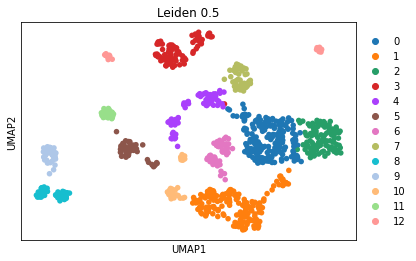

In [ ]:
ep.pp.knn_impute(adata)
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.3, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

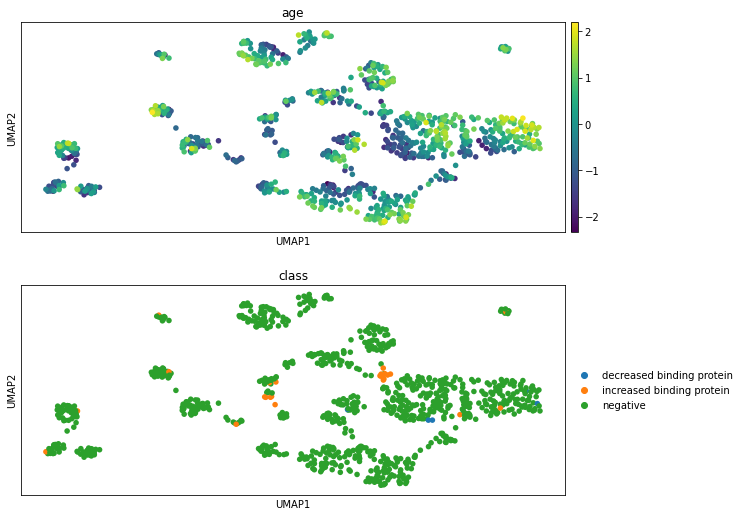

In [ ]:
ep.pl.umap(adata, color=["age", "class"], ncols=1, wspace=0.75)